In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
ord_encoder=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=ord_encoder.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [7]:
data['Alcohol_content']=df1

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


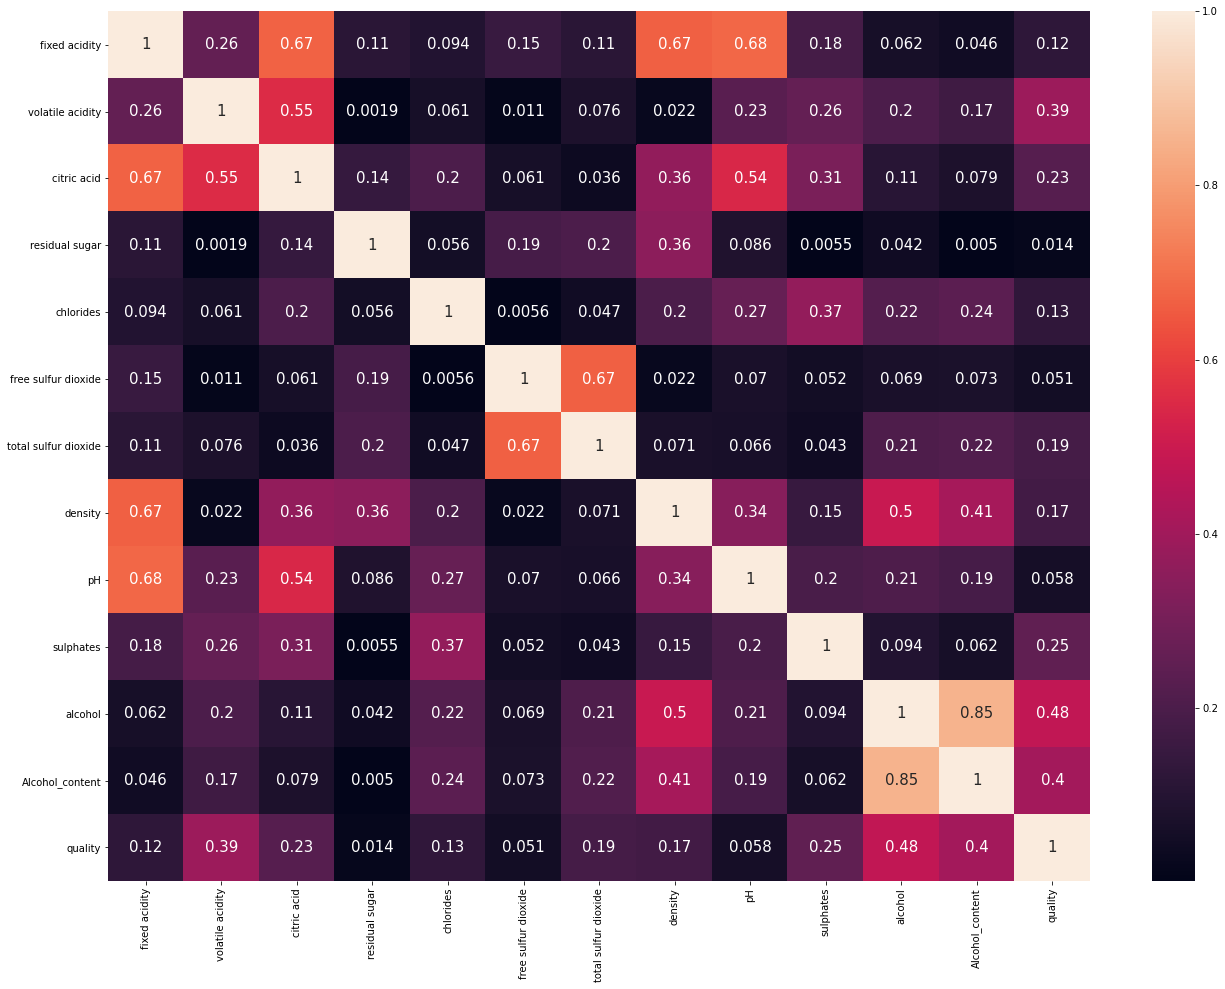

In [9]:
df_corr=data.corr().abs() 

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,  annot_kws={'size':15})
plt.show()

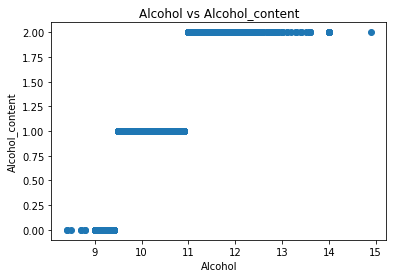

In [11]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol vs Alcohol_content')
plt.show()

In [12]:
X=data.drop(columns=['quality','Alcohol_content'])
y=data['quality']

In [13]:
x_train,x_test,y_tarin,y_test=train_test_split(X,y,test_size=0.25,random_state=41)

In [14]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_tarin)

DecisionTreeClassifier()

In [15]:
feature_name=list(X.columns)
class_name=list(y_tarin.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [16]:
!pip install graphviz

In [17]:
!pip install pydotplus

In [18]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus

# create a dot_file which stores the tree structure
dot_data=export_graphviz(clf,feature_names = feature_name,rounded= True,filled= True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png("myTree.png")
# Show graph
# Image(graph.create_png())

In [19]:
clf.score(x_train,y_tarin)

1.0

In [20]:
y_pred=clf.predict(x_test)

In [21]:
accuracy_score(y_test,y_pred)

0.645

In [22]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,8),
    'min_samples_split':range(3,8)
}

In [23]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [24]:
grid_search.fit(x_train,y_tarin)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(3, 8)})

In [25]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [26]:
clf=DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=10,min_samples_leaf=2)
clf.fit(x_train,y_tarin)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [27]:
y_pred=clf.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred) 

0.615